1. Giới thiệu

Trong những năm gần đây, các vấn đề liên quan đến sức khỏe cộng đồng ngày càng trở nên nghiêm trọng, đặc biệt là các bệnh lý mạn tính xuất phát từ lối sống và thói quen sinh hoạt hằng ngày. Nhiều nghiên cứu cho thấy, phần lớn các nguy cơ sức khỏe hoàn toàn có thể được dự đoán và phòng ngừa sớm nếu con người hiểu rõ các yếu tố ảnh hưởng và có những điều chỉnh phù hợp trong sinh hoạt.

Với sự phát triển của khoa học dữ liệu và học máy, việc khai thác dữ liệu sức khỏe để phát hiện các xu hướng, mối quan hệ tiềm ẩn và xây dựng các mô hình dự đoán đã trở thành một hướng tiếp cận hiệu quả trong việc hỗ trợ chăm sóc và phòng ngừa sức khỏe. Thông qua dữ liệu, chúng ta không chỉ quan sát được tình trạng hiện tại mà còn có thể dự đoán rủi ro trong tương lai.

Chính vì vậy, bài tập lớn này tập trung vào việc khai phá dữ liệu (Exploratory Data Analysis – EDA) và huấn luyện mô hình học máy nhằm dự đoán rủi ro sức khỏe của con người dựa trên các yếu tố liên quan đến lối sống và tình trạng sức khỏe tổng quát. Bộ dữ liệu được thu thập từ nhiều nhóm tuổi, nghề nghiệp và thói quen sinh hoạt khác nhau, giúp cung cấp một cái nhìn đa chiều về mối liên hệ giữa các đặc trưng này và mức độ rủi ro sức khỏe.

Trong quá trình thực hiện, bài tập lớn sẽ sử dụng các phương pháp thống kê mô tả và trực quan hóa dữ liệu để khám phá đặc điểm của bộ dữ liệu, sau đó áp dụng các mô hình học máy phù hợp để huấn luyện và đánh giá khả năng dự đoán rủi ro sức khỏe. Kết quả của bài tập không chỉ giúp hiểu rõ hơn các yếu tố ảnh hưởng đến sức khỏe mà còn minh họa cách ứng dụng dữ liệu vào các bài toán dự đoán trong thực tế.

2. Khai báo thư viện

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




# Cấu hình đẹp biểu đồ
plt.rcParams["figure.figsize"] = (8, 5)
sns.set_theme(style="whitegrid")


3. Đọc file dữ liệu 

In [2]:
df = pd.read_csv("Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv")




In [3]:
df.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


- **age** → Tuổi  
- **weight** → Cân nặng (kg)  
- **height** → Chiều cao (cm)  
- **exercise** → Mức độ vận động / tập thể dục  
- **sleep** → Thời gian ngủ trung bình mỗi ngày (giờ)  
- **sugar_intake** → Mức tiêu thụ đường  
- **smoking** → Tình trạng hút thuốc  
- **alcohol** → Mức độ sử dụng rượu/bia  
- **married** → Tình trạng hôn nhân  
- **profession** → Nghề nghiệp  
- **bmi** → Chỉ số khối cơ thể (BMI)  BMI=weight/height**2
- **health_risk** → Mức độ rủi ro sức khỏe  


In [4]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


**Không có giá trị thiếu (non-null 100%) ở tất cả các cột**

In [5]:
# Chuyển toàn bộ cột object sang categorical
obj_cols = df.select_dtypes(include='object').columns

df[obj_cols] = df[obj_cols].astype('category')
# Chuyển toàn bộ kiểu int sang float
int_cols = df.select_dtypes(include='int64').columns

df[int_cols] = df[int_cols].astype(float)

# Kiểm tra lại
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           5000 non-null   float64 
 1   weight        5000 non-null   float64 
 2   height        5000 non-null   float64 
 3   exercise      5000 non-null   category
 4   sleep         5000 non-null   float64 
 5   sugar_intake  5000 non-null   category
 6   smoking       5000 non-null   category
 7   alcohol       5000 non-null   category
 8   married       5000 non-null   category
 9   profession    5000 non-null   category
 10  bmi           5000 non-null   float64 
 11  health_risk   5000 non-null   category
dtypes: category(7), float64(5)
memory usage: 230.8 KB


In [6]:
df.describe()

,age,weight,height,sleep,bmi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,48.805600,77.359200,171.933200,6.997060,26.84388
std,17.906991,18.714567,15.822225,1.432849,8.25249
min,18.000000,45.000000,145.000000,3.000000,11.40000
25%,34.000000,61.000000,158.000000,6.000000,20.30000
50%,49.000000,77.000000,171.500000,7.000000,26.00000
75%,64.000000,94.000000,186.000000,8.000000,32.40000
max,79.000000,109.000000,199.000000,10.000000,51.40000


4. Biểu đồ hóa từng loại dữ liệu

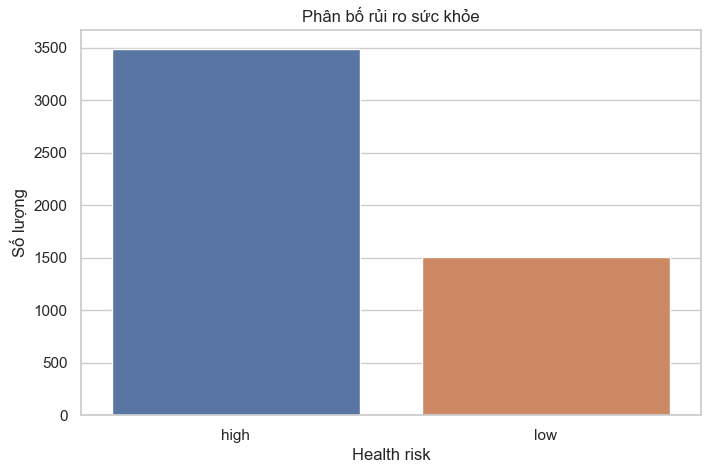

In [7]:
sns.countplot(data=df, x="health_risk", hue="health_risk")
plt.title("Phân bố rủi ro sức khỏe")
plt.xlabel("Health risk")
plt.ylabel("Số lượng")
plt.show()

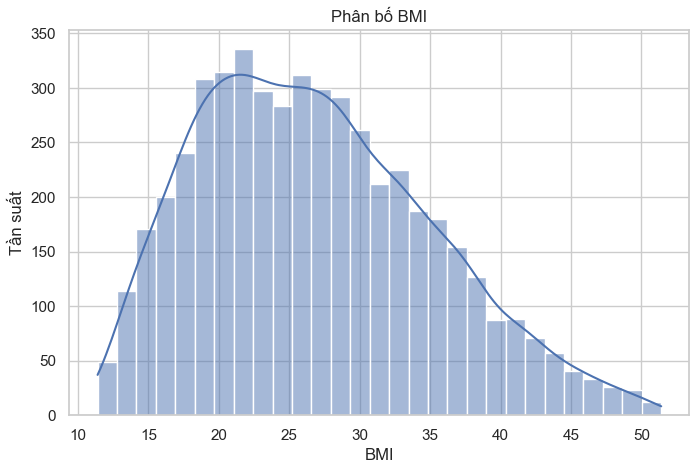

In [8]:
sns.histplot(data=df, x="bmi", kde=True)
plt.title("Phân bố BMI")
plt.xlabel("BMI")
plt.ylabel("Tần suất")
plt.show()


C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\3749695102.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


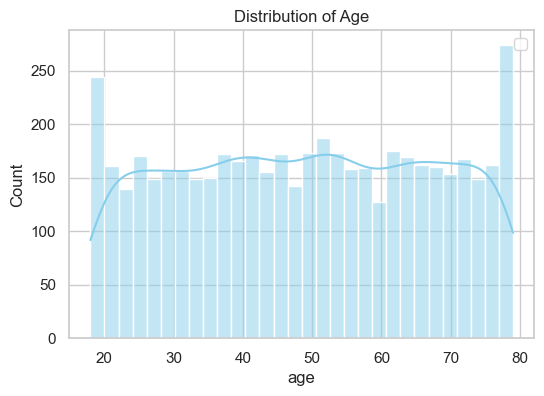

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df["age"], kde=True, bins=30, color="skyblue")
plt.xlabel("age")
plt.title("Distribution of Age")
plt.legend()
plt.show()


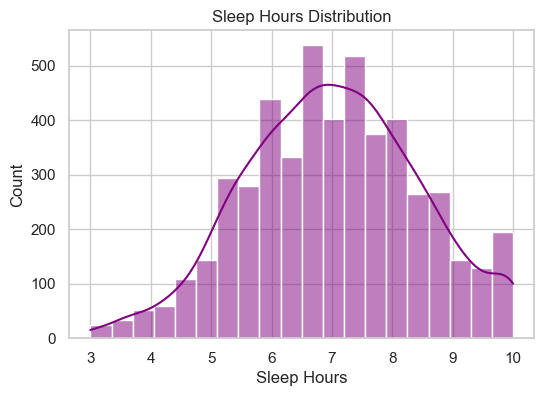

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df["sleep"], kde=True, bins=20, color="purple")
plt.xlabel("Sleep Hours")
plt.title("Sleep Hours Distribution")
plt.show()

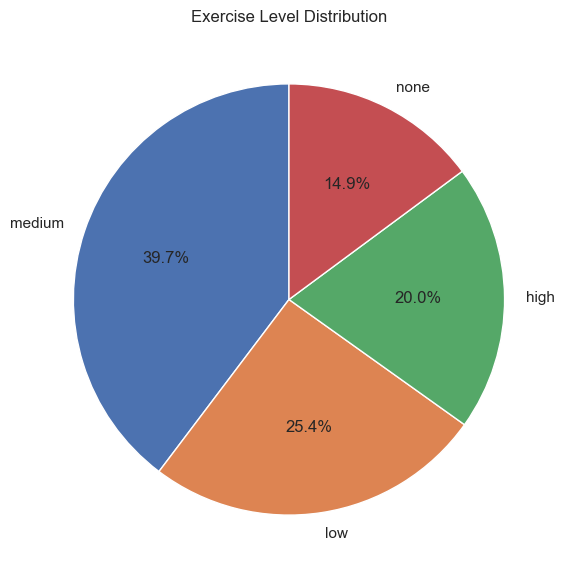

In [11]:
plt.figure(figsize=(7,7))
df['exercise'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Exercise Level Distribution")
plt.ylabel("")
plt.show()


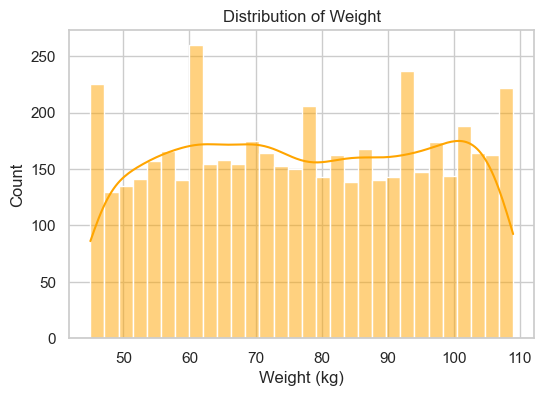

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df["weight"], kde=True, bins=30, color="orange")
plt.xlabel("Weight (kg)")
plt.title("Distribution of Weight")
plt.show()

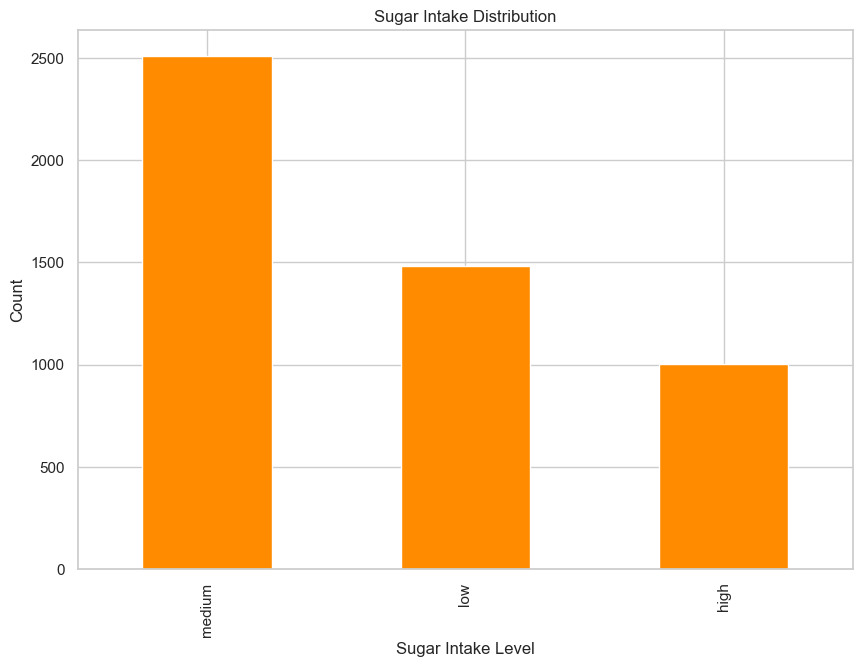

In [13]:
plt.figure(figsize=(10, 7))
df['sugar_intake'].value_counts().plot(kind='bar', color='darkorange')
plt.xlabel("Sugar Intake Level")
plt.ylabel("Count")
plt.title("Sugar Intake Distribution")
plt.show()

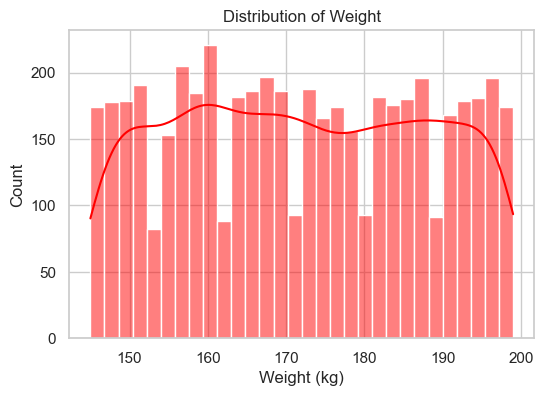

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df["height"], kde=True, bins=30, color="red")
plt.xlabel("Weight (kg)")
plt.title("Distribution of Weight")
plt.show()

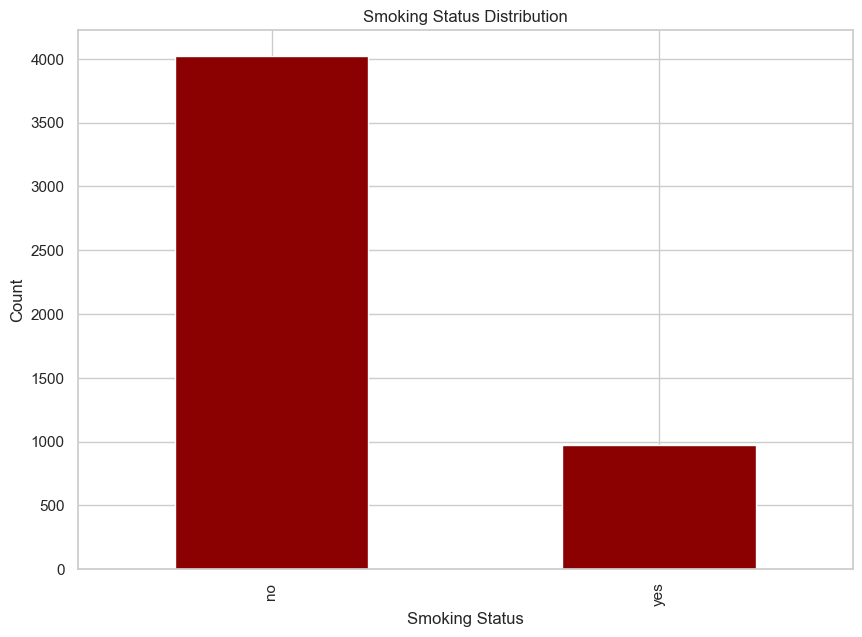

In [15]:
plt.figure(figsize=(10, 7))
df['smoking'].value_counts().plot(kind='bar', color='darkred')
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.title("Smoking Status Distribution")
plt.show()


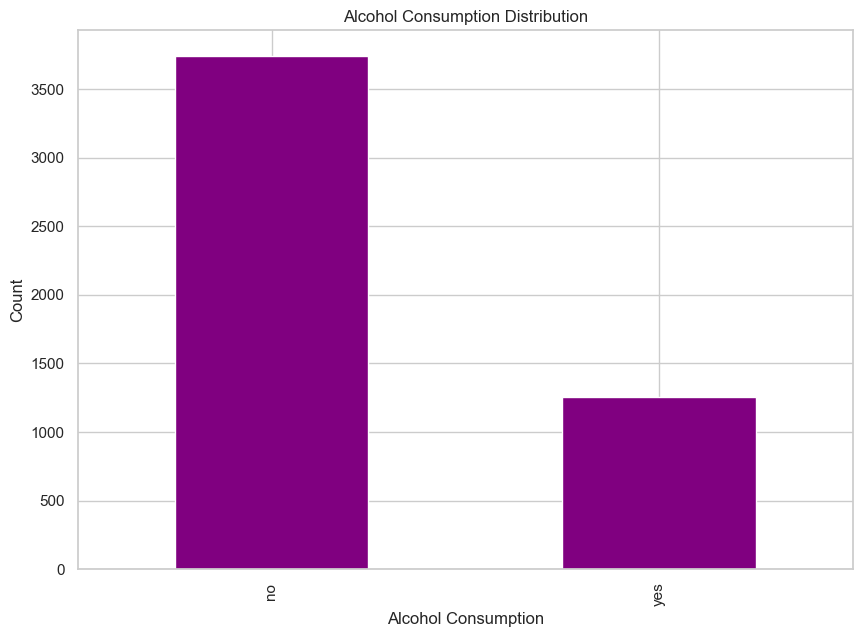

In [16]:
plt.figure(figsize=(10, 7))
df['alcohol'].value_counts().plot(kind='bar', color='purple')
plt.xlabel("Alcohol Consumption")
plt.ylabel("Count")
plt.title("Alcohol Consumption Distribution")
plt.show()


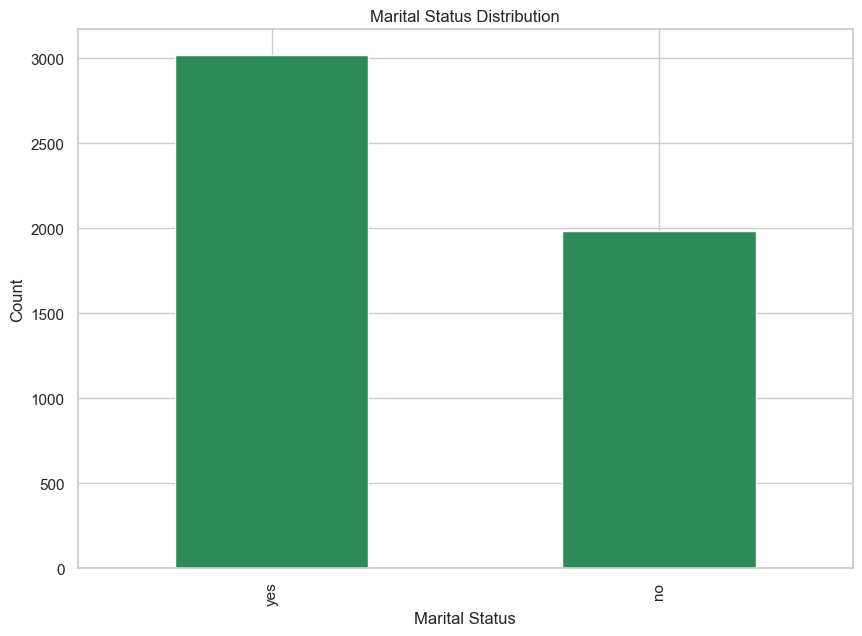

In [17]:
plt.figure(figsize=(10, 7))
df['married'].value_counts().plot(kind='bar', color='seagreen')
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Marital Status Distribution")
plt.show()


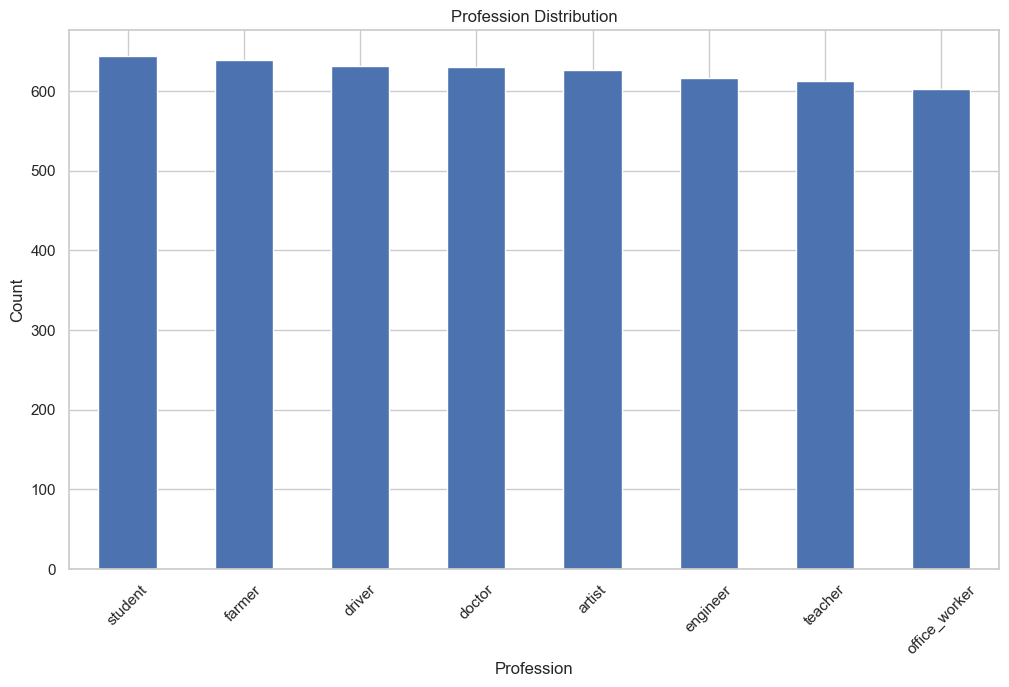

In [18]:
plt.figure(figsize=(12, 7))
df['profession'].value_counts().plot(kind='bar')
plt.xlabel("Profession")
plt.ylabel("Count")
plt.title("Profession Distribution")
plt.xticks(rotation=45)
plt.show()


<p style="color: green; font-size: 24px">
   5. Exploratory Data Analysis (EDA)
</p>


<p style="color: black; font-size: 20px">
5.1 . Tương quan các đặc trưng với cột phân loại
</p>

<p style="color: red; font-size: 25px;text-align:center">
Đặc trưng numeric
</p>

In [19]:
num_cols = df.select_dtypes(include='float64').columns.tolist()
num_cols


['age', 'weight', 'height', 'sleep', 'bmi']

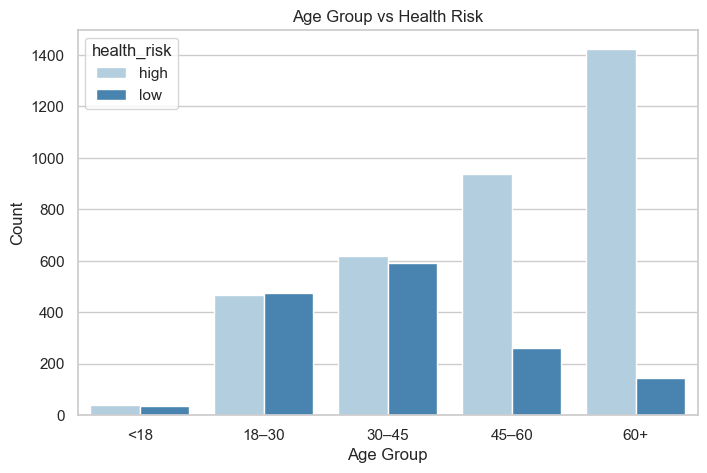

In [20]:

df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 18, 30, 45, 60, 100],
    labels=['<18', '18–30', '30–45', '45–60', '60+']
)

sns.countplot(
    data=df,
    x='age_group',
    hue='health_risk',
    palette='Blues'
)
plt.title('Age Group vs Health Risk')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()



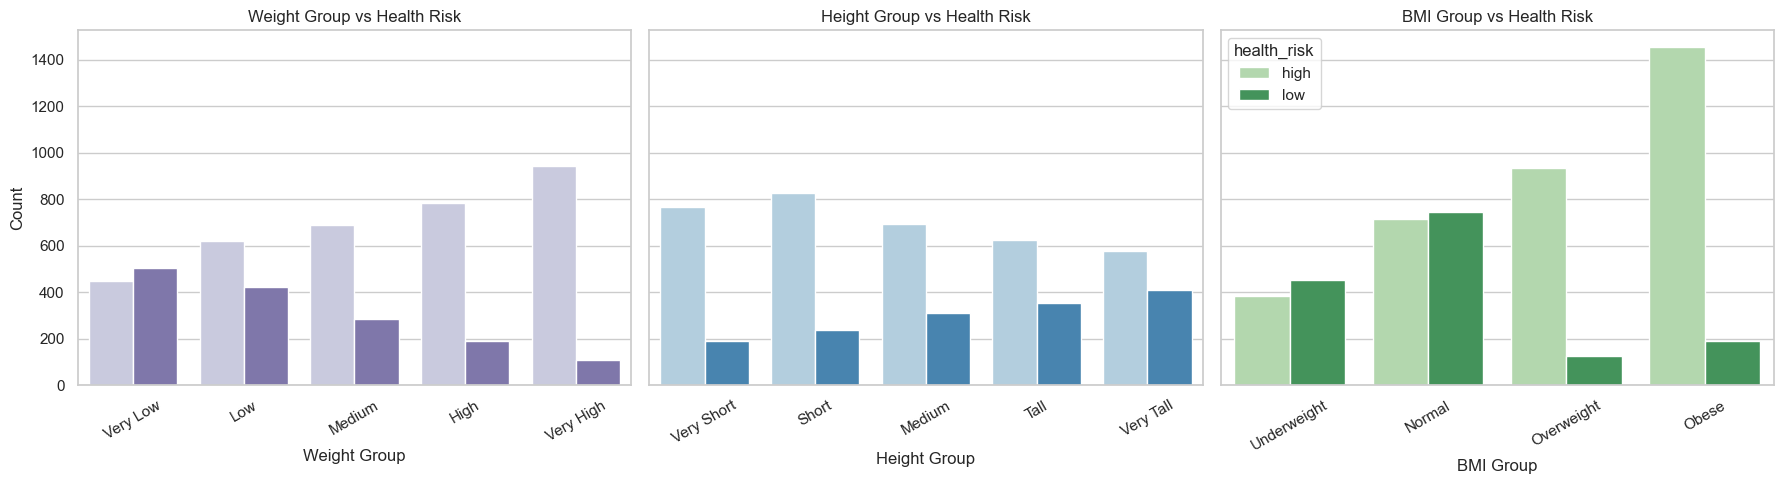

In [21]:
df['weight_group'] = pd.cut(
    df['weight'],
    bins=5,
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

df['height_group'] = pd.cut(
    df['height'],
    bins=5,
    labels=['Very Short', 'Short', 'Medium', 'Tall', 'Very Tall']
)
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_group'] = pd.cut(
    df['bmi'],
    bins=bmi_bins,
    labels=bmi_labels)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Weight
sns.countplot(
    data=df,
    x='weight_group',
    hue='health_risk',
    palette='Purples',
    ax=axes[0]
)
axes[0].set_title('Weight Group vs Health Risk')
axes[0].set_xlabel('Weight Group')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=30)

# Height
sns.countplot(
    data=df,
    x='height_group',
    hue='health_risk',
    palette='Blues',
    ax=axes[1]
)
axes[1].set_title('Height Group vs Health Risk')
axes[1].set_xlabel('Height Group')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=30)

# BMI
sns.countplot(
    data=df,
    x='bmi_group',
    hue='health_risk',
    palette='Greens',
    ax=axes[2]
)
axes[2].set_title('BMI Group vs Health Risk')
axes[2].set_xlabel('BMI Group')
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=30)

# Chỉ giữ legend ở biểu đồ cuối
axes[0].get_legend().remove()
axes[1].get_legend().remove()

plt.tight_layout()
plt.show()


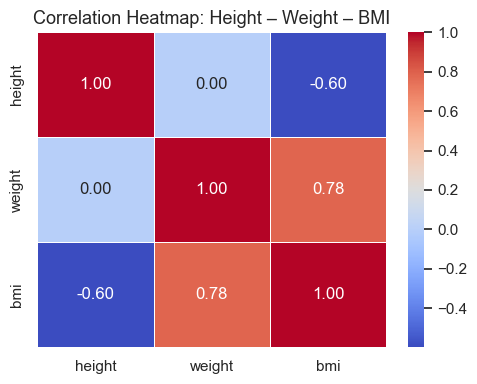

In [22]:
cols = ["height", "weight", "bmi"]

corr = df[cols].corr()

plt.figure(figsize=(5,4))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap: Height – Weight – BMI", fontsize=13)
plt.tight_layout()
plt.show()

Biểu đồ tương quan (heatmap) cho thấy BMI có mối tương quan dương mạnh với cân nặng (0,78) và mối tương quan âm ở mức trung bình với chiều cao (-0,60).
Điều này cho thấy BMI đã tổng hợp thông tin kết hợp của cả chiều cao và cân nặng.
Do đó, việc giữ lại cả chiều cao và cân nặng sẽ gây ra sự dư thừa thông tin và hiện tượng đa cộng tuyến (multicollinearity).
Chiều cao và cân nặng được loại khỏi quá trình huấn luyện mô hình vì phần lớn thông tin của hai biến này đã được tổng hợp trong chỉ số BMI – một biến dẫn xuất kết hợp cả chiều cao và cân nặng. Phân tích tương quan cho thấy BMI có mối quan hệ dương mạnh với cân nặng và mối quan hệ âm ở mức trung bình với chiều cao, phản ánh sự trùng lặp thông tin giữa các biến. Bên cạnh đó, kết quả trực quan hóa cho thấy BMI có khả năng phân biệt mức độ rủi ro sức khỏe rõ ràng hơn, trong khi chiều cao gần như không thể hiện xu hướng phân biệt và cân nặng có sự chồng chéo đáng kể giữa các nhóm rủi ro. Hơn nữa, chiều cao và cân nặng không có ngưỡng y khoa độc lập để đánh giá rủi ro sức khỏe, trong khi BMI tuân theo các ngưỡng chuẩn của Tổ chức Y tế Thế giới (WHO). Do đó, việc giữ đồng thời chiều cao và cân nặng sẽ gây dư thừa thông tin và hiện tượng đa cộng tuyến, không mang lại lợi ích đáng kể cho hiệu năng và khả năng diễn giải của mô hình. Vì vậy, BMI được giữ lại làm đặc trưng đại diện, còn chiều cao và cân nặng được loại bỏ khỏi tập dữ liệu huấn luyện.

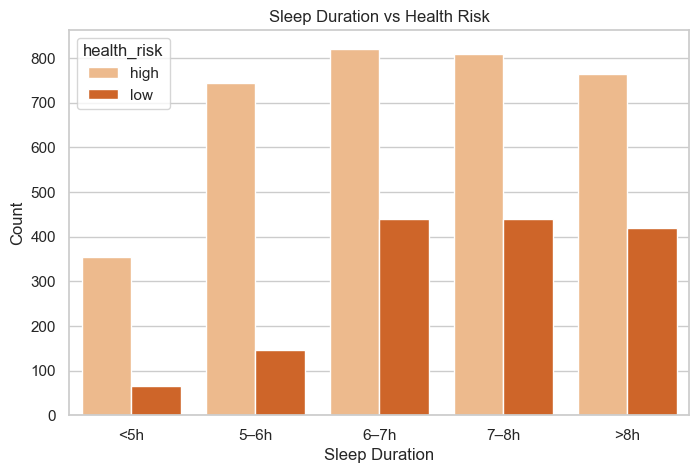

In [23]:
df['sleep_group'] = pd.cut(
    df['sleep'],
    bins=[0, 5, 6, 7, 8, 24],
    labels=['<5h', '5–6h', '6–7h', '7–8h', '>8h']
)

sns.countplot(
    data=df,
    x='sleep_group',
    hue='health_risk',
    palette='Oranges'
)
plt.title('Sleep Duration vs Health Risk')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.show()


<p ><span style="color:blue;font-size:25;font-weight:600">Nhận xét: </span>Age (Tuổi).
Kết quả phân tích cho thấy nguy cơ sức khỏe có xu hướng tăng theo độ tuổi. Ở các nhóm tuổi trẻ, số lượng cá nhân thuộc nhóm rủi ro cao và thấp tương đối cân bằng, trong khi  từ nhóm trung niên trở lên, số lượng cá nhân có mức rủi ro cao tăng rõ rệt. Điều này cho thấy tuổi là một yếu tố quan trọng, có mối liên hệ thuận chiều với rủi ro sức khỏe.

BMI (Chỉ số khối cơ thể).
BMI thể hiện mối liên hệ rất rõ ràng với biến phân loại rủi ro sức khỏe. Các nhóm có BMI thấp hoặc bình thường chủ yếu thuộc nhóm rủi ro thấp, trong khi các nhóm thừa cân và béo phì có tỷ lệ rủi ro cao vượt trội. Kết quả này khẳng định BMI là đặc trưng dạng số có ảnh hưởng mạnh nhất trong bộ dữ liệu.

Sleep Duration (Thời gian ngủ).
Thời gian ngủ cho thấy mối quan hệ phi tuyến với rủi ro sức khỏe. Những cá nhân ngủ quá ít có tỷ lệ rủi ro cao lớn hơn, trong khi nhóm ngủ với thời lượng vừa phải có xu hướng giảm nguy cơ. Tuy nhiên, việc ngủ quá nhiều cũng không làm giảm rủi ro đáng kể, cho thấy tồn tại một khoảng thời gian ngủ tối ưu cho sức khỏe.</p>

<p style="color: red; font-size: 25px;text-align:center">Đặc trưng categorical</p>

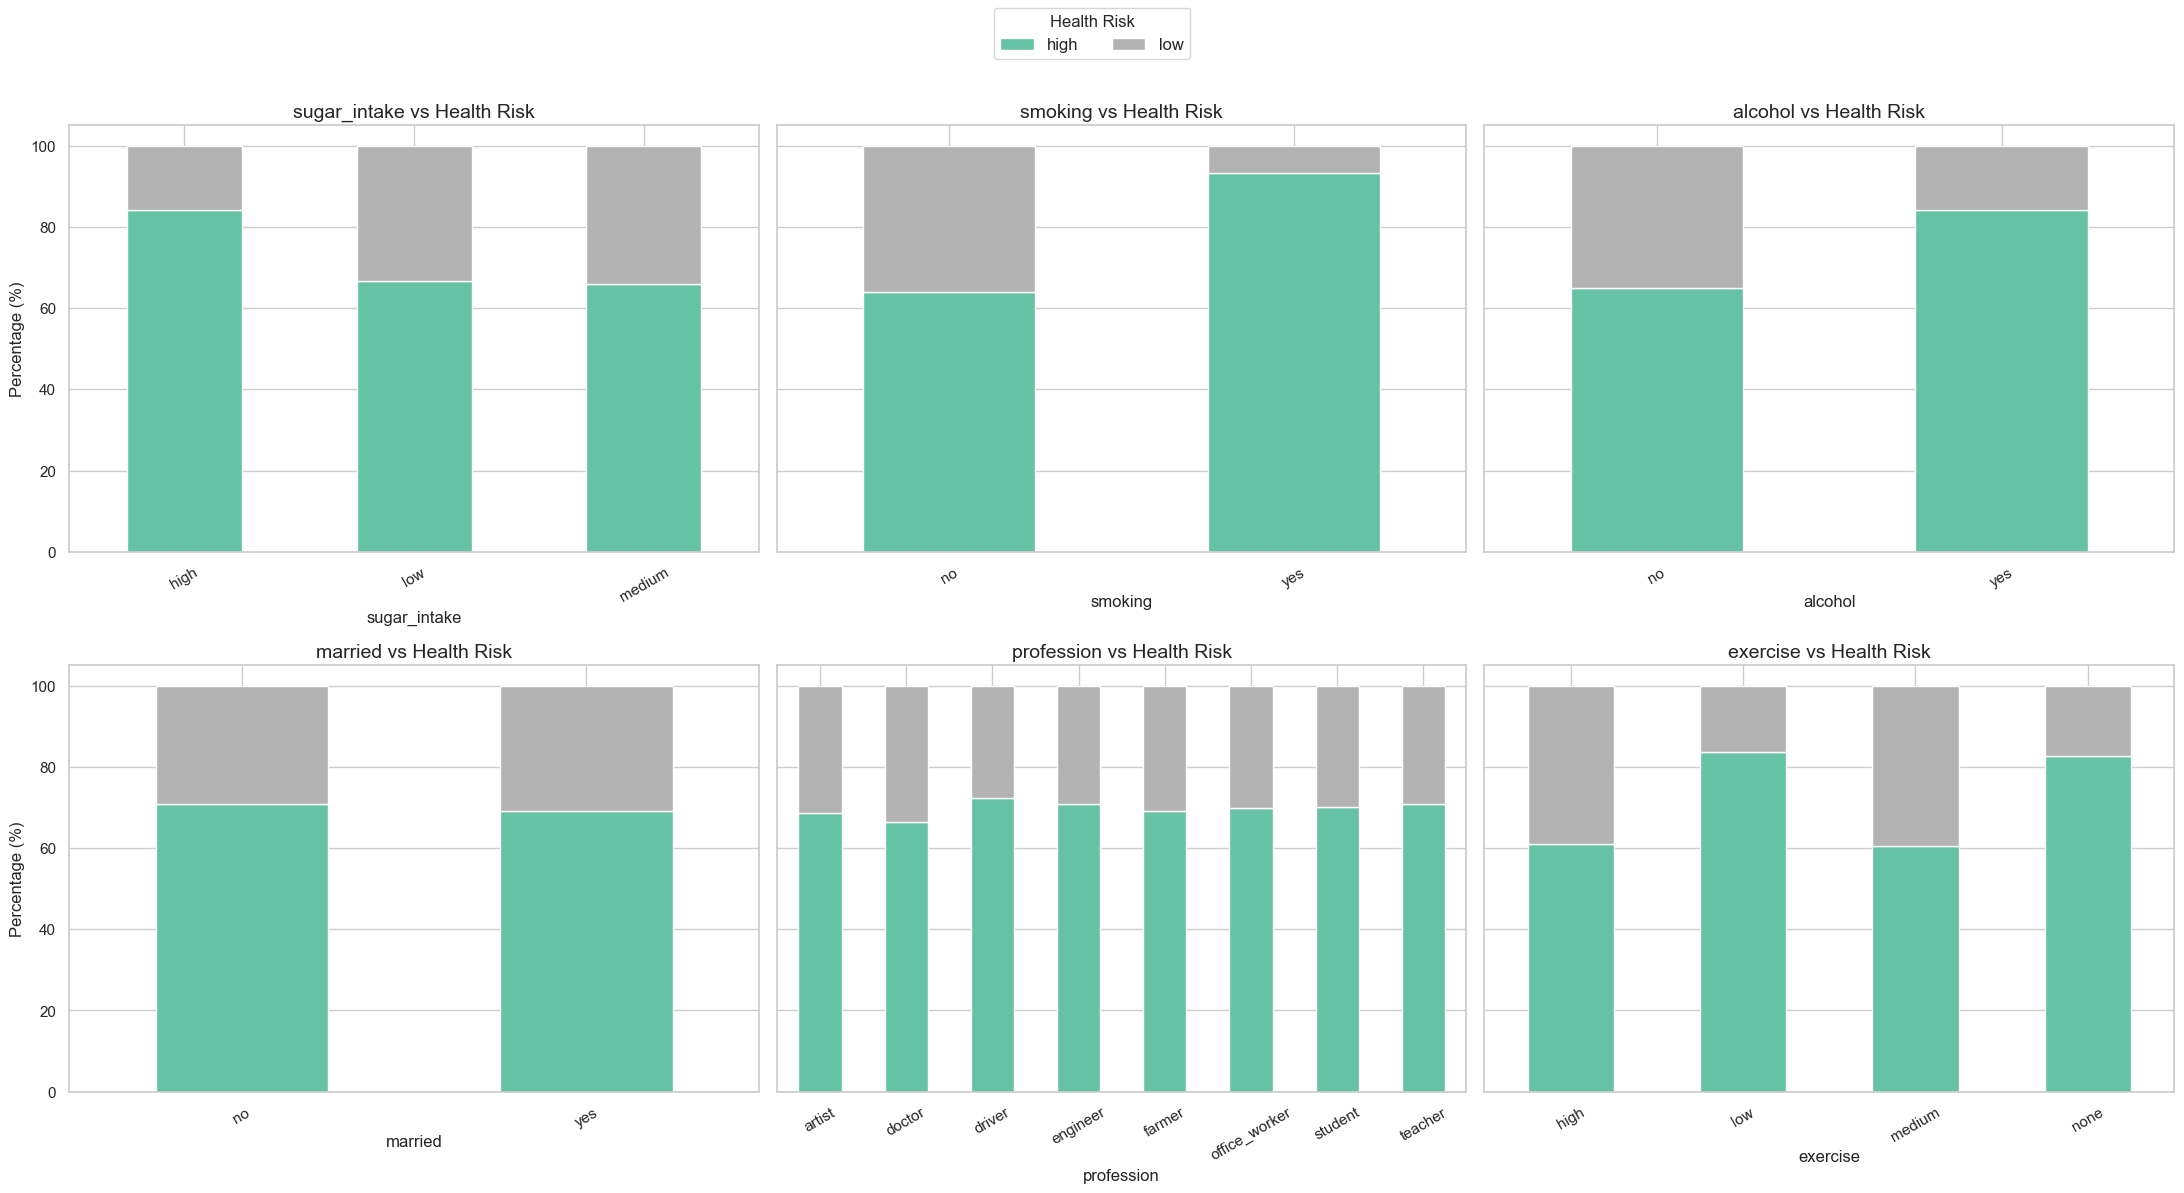

In [24]:
cat_cols = [
    'sugar_intake',
    'smoking',
    'alcohol',
    'married',
    'profession',
    'exercise'   
]

fig, axes = plt.subplots(2, 3, figsize=(22, 12), sharey=True)
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    prop_df = (
        pd.crosstab(df[col], df['health_risk'], normalize='index') * 100
    )

    prop_df.plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        colormap='Set2',
        legend=False
    )

    axes[i].set_title(f'{col} vs Health Risk', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Percentage (%)', fontsize=12)
    axes[i].tick_params(axis='x', rotation=30)

# Legend chung
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Health Risk',
    loc='upper center',
    ncol=3,
    fontsize=12
)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


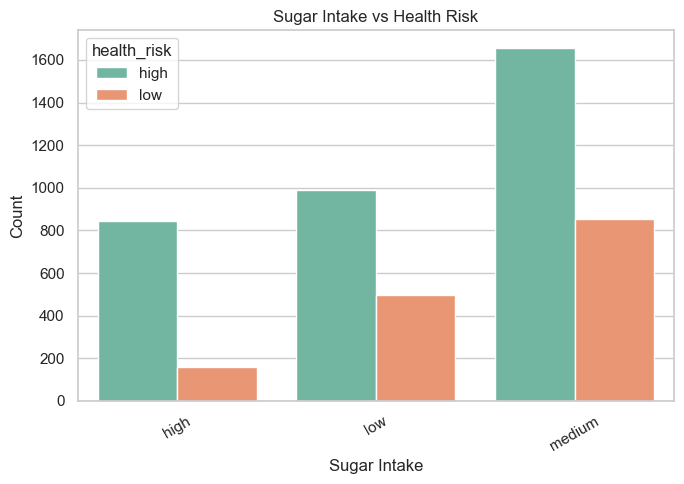

In [25]:
# suger_intake vs health_risk
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x='sugar_intake',
    hue='health_risk',
    palette='Set2'
)
plt.title('Sugar Intake vs Health Risk')
plt.xlabel('Sugar Intake')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

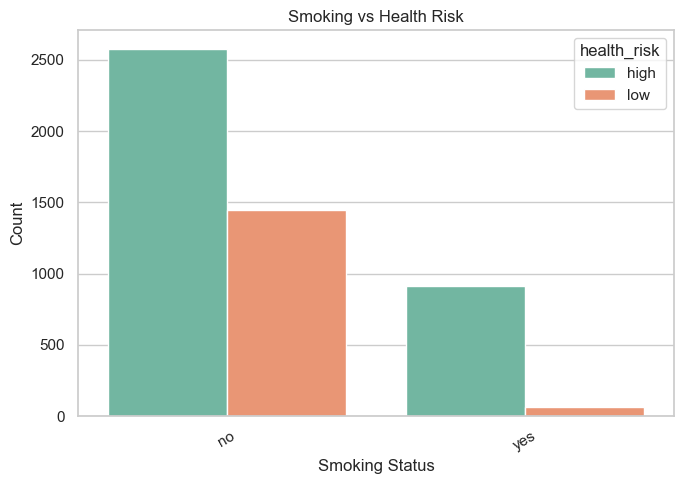

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x='smoking',
    hue='health_risk',
    palette='Set2'
)
plt.title('Smoking vs Health Risk')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


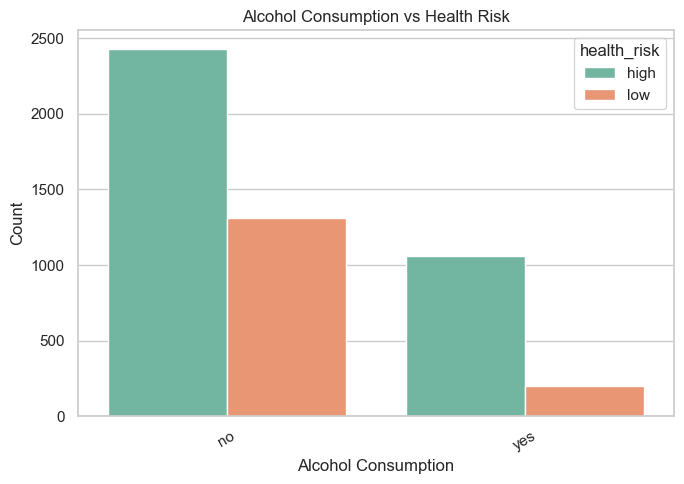

In [27]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x='alcohol',
    hue='health_risk',
    palette='Set2'
)
plt.title('Alcohol Consumption vs Health Risk')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


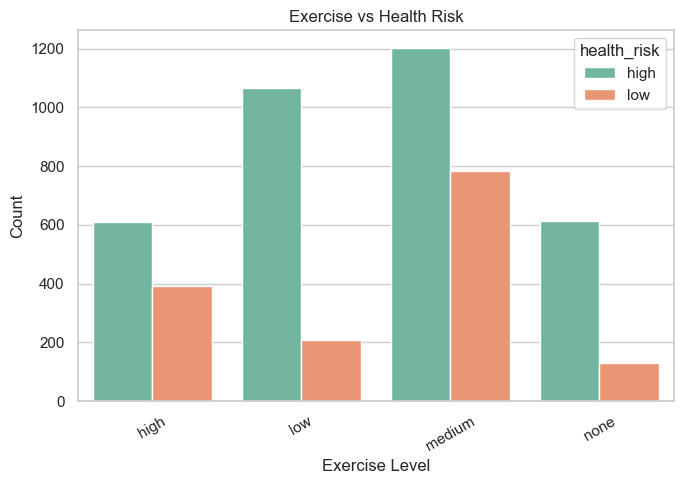

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x='exercise',
    hue='health_risk',
    palette='Set2'
)
plt.title('Exercise vs Health Risk')
plt.xlabel('Exercise Level')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


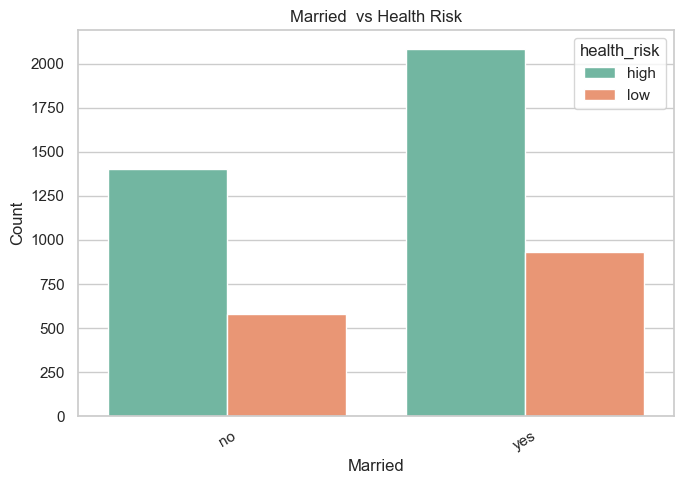

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x='married',
    hue='health_risk',
    palette='Set2'
)
plt.title('Married  vs Health Risk')
plt.xlabel('Married')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Phân bố các mức health_risk giữa nhóm đã kết hôn và chưa kết hôn gần như tương đồng.
Không xuất hiện xu hướng hoặc sự chênh lệch rõ ràng giữa các nhóm.
**Kết luận:** Married không có khả năng phân biệt mức độ rủi ro sức khỏe → loại bỏ.

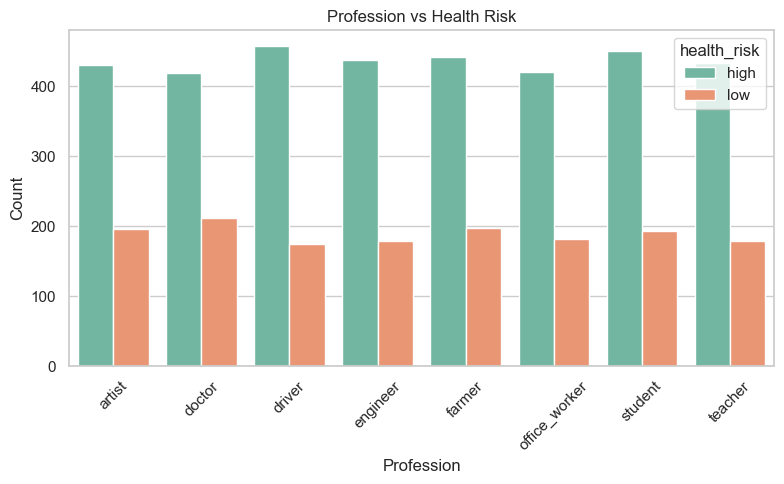

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='profession',
    hue='health_risk',
    palette='Set2'
)
plt.title('Profession vs Health Risk')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Biểu đồ cho thấy số lượng nhóm nghề nghiệp lớn, mỗi nhóm có số mẫu tương đối nhỏ.
Phân bố health_risk giữa các nghề không ổn định và thiếu nhất quán, dễ gây nhiễu cho mô hình.
**Kết luận:** Profession có mức độ liên quan yếu và tiềm ẩn nguy cơ overfitting → loại bỏ.


<p style="color:black;"><span style="color:blue;font-size:25;font-weight:600">Nhận xét: </span>Kết quả trực quan hóa bằng biểu đồ cột cho thấy các đặc trưng liên quan đến lối sống như mức tiêu thụ đường, hút thuốc, uống rượu và mức độ vận động có mối quan hệ rõ ràng với rủi ro sức khỏe. Cụ thể, nhóm tiêu thụ nhiều đường, hút thuốc và uống rượu có tỷ lệ rủi ro sức khỏe cao lớn hơn, trong khi nhóm vận động nhiều có xu hướng rủi ro thấp hơn. Ngược lại, các biến trạng thái hôn nhân và nghề nghiệp không thể hiện sự khác biệt đáng kể về phân bố mức độ rủi ro sức khỏe giữa các nhóm, cho thấy khả năng phân biệt nhãn yếu và tiềm ẩn nguy cơ gây nhiễu cho mô hình. Do đó, các biến liên quan đến lối sống được giữ lại cho quá trình huấn luyện, trong khi married và profession được loại bỏ trong bước lựa chọn đặc trưng.</p>

<p style="color: black; font-size: 20px">
5.2 . Tương quan tuyến tính giữa các cột 

</p>

In [31]:
from itertools import combinations
import plotly.express as px

num_cols = ['age', 'sleep', 'bmi']
target = 'health_risk'

for x_col, y_col in combinations(num_cols, 2):
    fig = px.scatter(
        df,
        x=x_col,
        y=y_col,
        color=target,
        template='plotly_dark',
        opacity=0.7,
        height=600,
        width=800,
        color_discrete_map={
            'high': 'red',
            'low': 'cyan'
        }
    )
    fig.update_traces(marker=dict(size=5))
    fig.update_layout(title=f'{x_col} vs {y_col}')
    fig.show()


C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



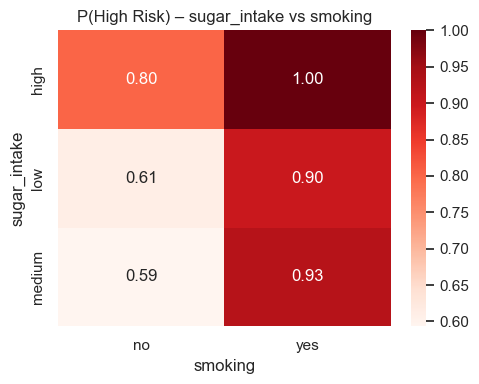

C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



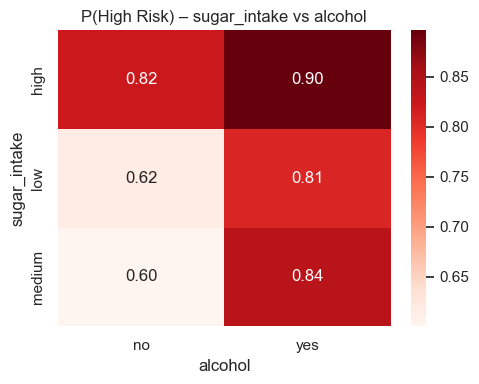

C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



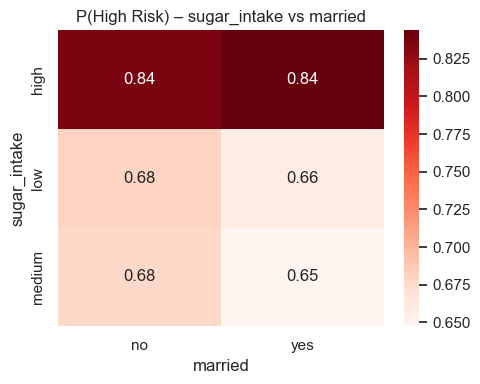

C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



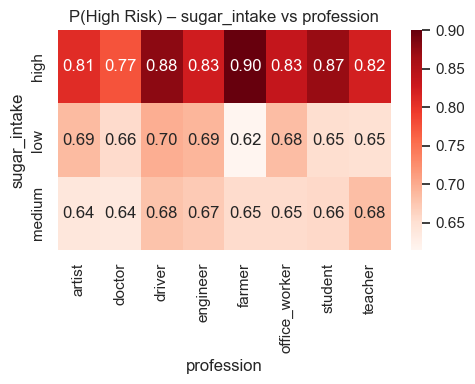

C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



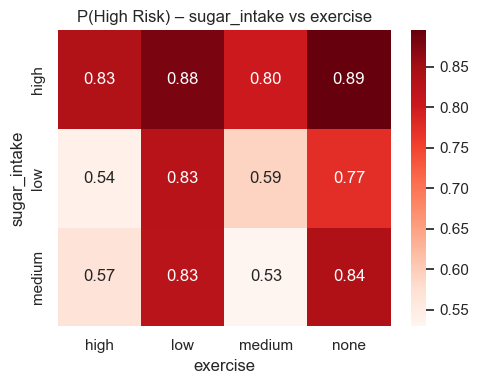

C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



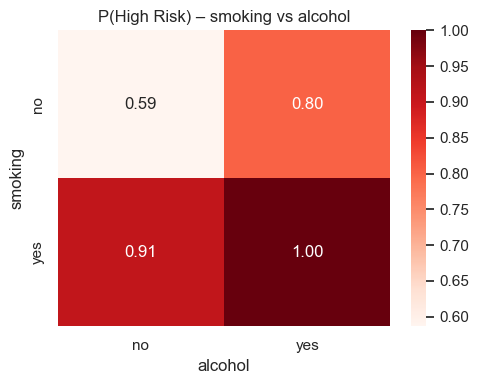

C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



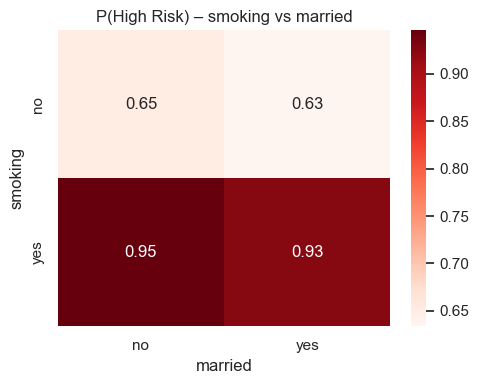

C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



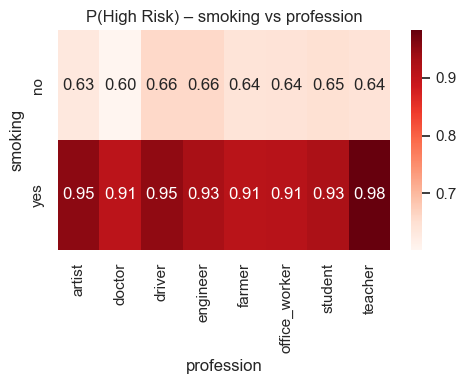

C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



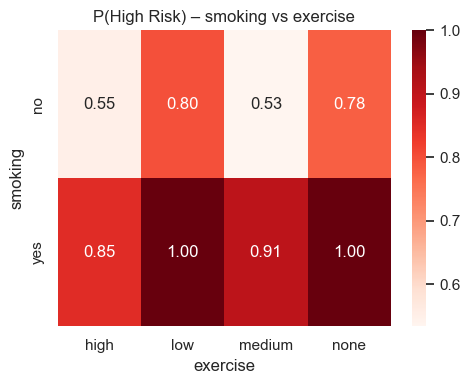

C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



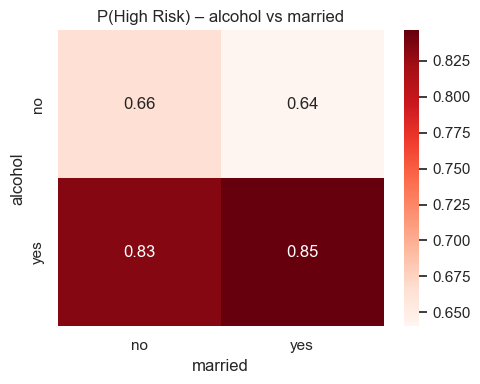

C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



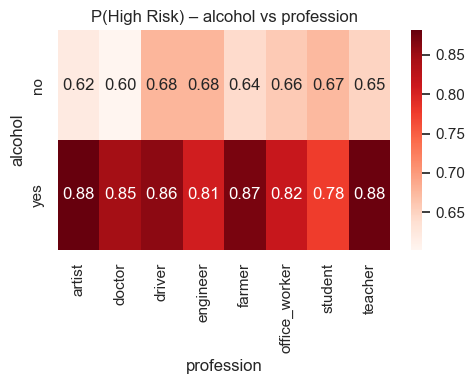

C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



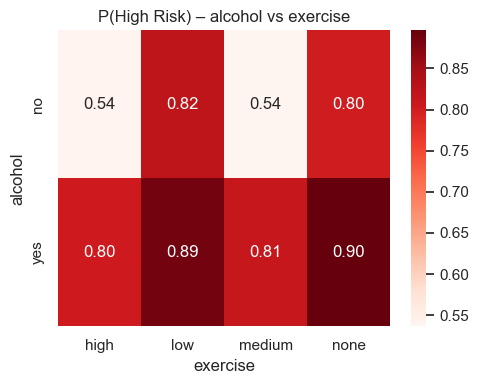

C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



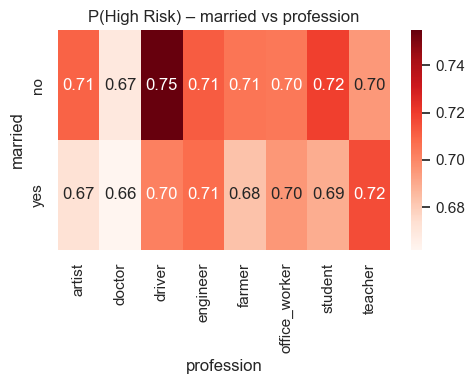

C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



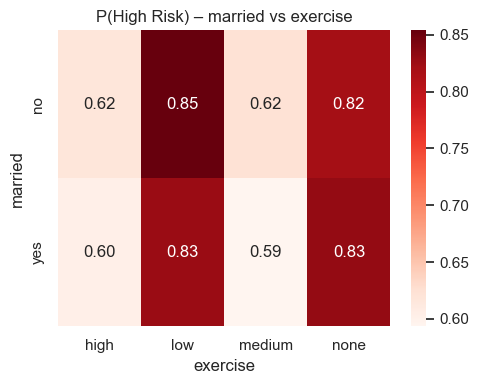

C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\2358283890.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



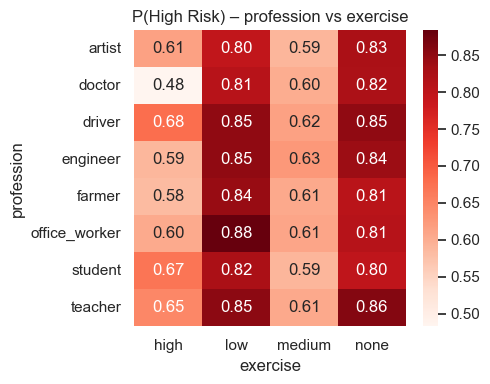

In [32]:
df_tmp = df.copy()
df_tmp['health_risk_bin'] = (df_tmp['health_risk']=='high').astype(int)

for col1, col2 in combinations(cat_cols, 2):
    ct = df_tmp.pivot_table(
        index=col1,
        columns=col2,
        values='health_risk_bin',
        aggfunc='mean'
    )

    plt.figure(figsize=(5,4))
    sns.heatmap(
        ct,
        annot=True,
        cmap='Reds',
        fmt='.2f'
    )
    plt.title(f'P(High Risk) – {col1} vs {col2}')
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.tight_layout()
    plt.show()


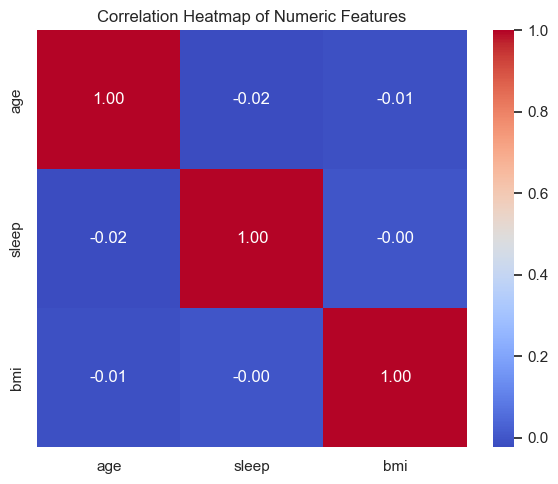

In [33]:


num_cols = ['age', 'sleep', 'bmi']

corr = df[num_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


C:\Users\VAM2019\AppData\Local\Temp\ipykernel_8936\192707223.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



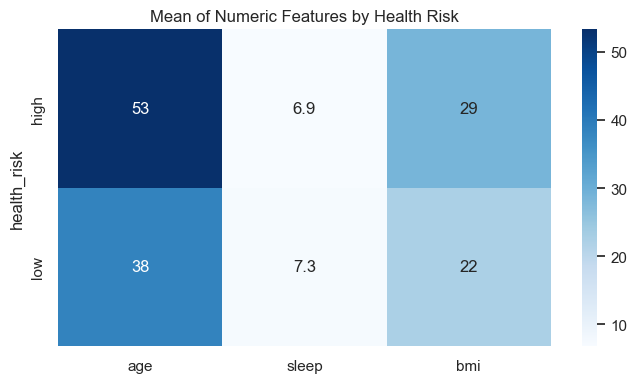

In [34]:
grouped = df.groupby('health_risk')[num_cols].mean()

plt.figure(figsize=(7,4))
sns.heatmap(
    grouped,
    annot=True,
    cmap='Blues'
)
plt.title('Mean of Numeric Features by Health Risk')
plt.tight_layout()
plt.show()


<p style="color: black; font-size: 20px">
5.3 . Xếp hạng độ quan trọng các feature

</p>

Xếp hạng độ quan trọng (Pearson correlation):
age      0.379783
bmi      0.358842
sleep   -0.138019
Name: health_risk_bin, dtype: float64


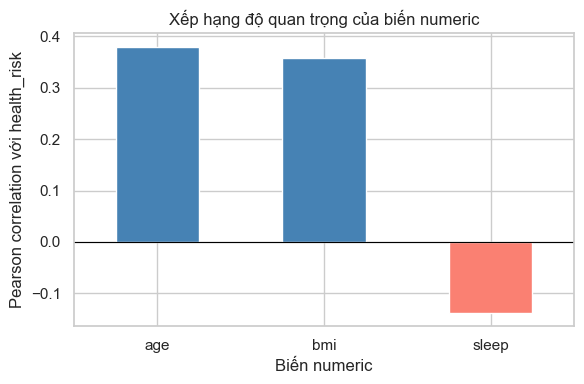

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

num_cols = ['age', 'sleep', 'bmi']


df['health_risk_bin'] = (df['health_risk'] == 'high').astype(int)


corr_with_target = (
    df[num_cols + ['health_risk_bin']]
    .corr()['health_risk_bin']
    .drop('health_risk_bin') 
    .sort_values(key=abs, ascending=False)
)

# 4. In kết quả
print("Xếp hạng độ quan trọng (Pearson correlation):")
print(corr_with_target)

# 5. Vẽ biểu đồ xếp hạng
plt.figure(figsize=(6,4))
corr_with_target.plot(
    kind='bar',
    color=['steelblue' if v > 0 else 'salmon' for v in corr_with_target]
)
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Pearson correlation với health_risk")
plt.xlabel("Biến numeric")
plt.title("Xếp hạng độ quan trọng của biến numeric")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Xếp hạng biến categorical theo mức độ quan trọng:
smoking         0.251820
exercise        0.240939
alcohol         0.179828
sugar_intake    0.154860
married         0.012324
profession      0.000000
dtype: float64


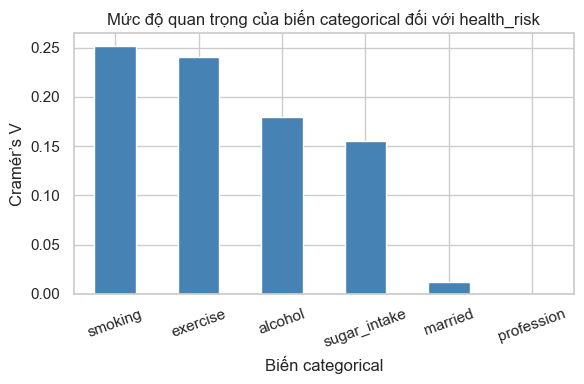

In [36]:
from scipy.stats import chi2_contingency

# ===== 1. Khai báo biến =====
cat_cols = ['exercise', 'sugar_intake', 'smoking', 'alcohol','married', 'profession']
target = 'health_risk'

# ===== 2. Hàm tính Cramér’s V (có bias correction) =====
def cramers_v(x, y):
    confusion = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion)
    n = confusion.values.sum()

    phi2 = chi2 / n
    r, k = confusion.shape

    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)

    return np.sqrt(phi2corr / min((rcorr - 1), (kcorr - 1)))

# ===== 3. Tính Cramér’s V cho từng biến =====
cramers_scores = {
    col: cramers_v(df[col], df[target])
    for col in cat_cols
}

cramers_rank = (
    pd.Series(cramers_scores)
    .sort_values(ascending=False)
)

# ===== 4. In kết quả =====
print("Xếp hạng biến categorical theo mức độ quan trọng:")
print(cramers_rank)

# ===== 5. Vẽ biểu đồ =====
plt.figure(figsize=(6,4))
cramers_rank.plot(kind='bar', color='steelblue')
plt.ylabel("Cramér’s V")
plt.xlabel("Biến categorical")
plt.title("Mức độ quan trọng của biến categorical đối với health_risk")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

<p style="color: green; font-size: 24px">
   6. Feature Engineering
</p>


<p>6.1 Feature Engineering cho NUMERIC</p>
Vì BMI đã tổng hợp toàn bộ thông tin của height và weight, nên giữ thêm height/weight là thừa thông tin (redundant) và có thể gây nhiễu.


In [37]:

df_fe = df.copy()

# Nhóm tuổi
df_fe['age_group'] = pd.cut(
    df_fe['age'],
    bins=[0, 18, 30, 45, 60, 100],
    labels=[  'Dưới 18 tuổi',
        'Thanh niên',
        'Trưởng thành',
        'Trung niên',
        'Cao tuổi']
)

# Nhóm thời gian ngủi gian ngủ
df_fe['sleep_group'] = pd.cut(
    df_fe['sleep'],
    bins=[0, 5, 6, 7, 8, 24],
    labels=['<5h', '5–6h', '6–7h', '7–8h', '>8h']
)


# Nhóm BMI theo y học
df_fe['bmi_group'] = pd.cut(
    df_fe['bmi'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['underweight', 'normal', 'overweight', 'obese']
)


In [38]:
df_fe[['age_group', 'sleep_group', 'bmi_group']].head()


,age_group,sleep_group,bmi_group
0,Trung niên,6–7h,underweight
1,Cao tuổi,6–7h,overweight
2,Trung niên,6–7h,obese
3,Trưởng thành,>8h,underweight
4,Trung niên,7–8h,overweight


<p>6.2 Feature Engineering cho CATEGORICAL <p/>
Chúng ta sẽ bỏ 2 cột professtional và married vì 2 cột này ảnh hưởng rất thấp và có thể gây nhiễu cho các mô hình huấn luyện

In [39]:
selected_cat = ['exercise', 'sugar_intake', 'smoking', 'alcohol']
df_fe[selected_cat].head()

,exercise,sugar_intake,smoking,alcohol
0,low,medium,yes,yes
1,high,high,no,no
2,high,low,yes,no
3,medium,medium,no,no
4,high,low,no,no


<p style="color: green; font-size: 24px">
   7. Data Processing
</p>


In [40]:
# Numeric
num_cols = ['age', 'sleep', 'bmi']

# Categorical
cat_cols = ['exercise', 'sugar_intake', 'smoking', 'alcohol']

# Target
target = 'health_risk'


# DataFrame cuối cùng
df_model = df[num_cols + cat_cols + [target]].copy()
df_model.head()


,age,sleep,bmi,exercise,sugar_intake,smoking,alcohol,health_risk
0,56.0,6.1,17.6,low,medium,yes,yes,high
1,69.0,6.9,26.3,high,high,no,no,high
2,46.0,6.6,45.3,high,low,yes,no,high
3,32.0,8.5,15.6,medium,medium,no,no,low
4,60.0,8.0,25.8,high,low,no,no,high


Xử lý missing value

In [60]:
df_model.shape
df_model.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           5000 non-null   float64 
 1   sleep         5000 non-null   float64 
 2   bmi           5000 non-null   float64 
 3   exercise      5000 non-null   category
 4   sugar_intake  5000 non-null   category
 5   smoking       5000 non-null   category
 6   alcohol       5000 non-null   category
 7   health_risk   5000 non-null   category
dtypes: category(5), float64(3)
memory usage: 142.4 KB


==> Dữ liệu không bị thiếu 


Kiểm tra mất cân bằng cột taget

In [50]:
# Encode nhãn mục tiêu
X = df_model[num_cols + cat_cols]
y = (df_model[target] == 'high').astype(int)
y.head()

0    1
1    1
2    1
3    0
4    1
Name: health_risk, dtype: int64

Kiểm tra mất cân bằng cột target

In [49]:
df_model['health_risk'].value_counts(normalize=True) * 100

health_risk
high    69.8
low     30.2
Name: proportion, dtype: float64

==> Cột bị mất cân bằng vừa không quá cần thiết phải xử lý 


Encoding, Scaler

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),   # cho KNN + Logistic
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
X_train.shape, X_test.shape

((4000, 7), (1000, 7))

<p style="color: green; font-size: 24px">
   8. Huấn luyện mô hình 
</p>


<p style="color:red;text-align:center;font-size:25"> KNN</p>

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', knn)
])

knn_pipe.fit(X_train, y_train)

# Predict
y_train_pred = knn_pipe.predict(X_train)
y_test_pred = knn_pipe.predict(X_test)

print("===== KNN =====")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


===== KNN =====
Training Accuracy: 0.968
Test Accuracy: 0.935

Confusion Matrix:
[[262  40]
 [ 25 673]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       302
           1       0.94      0.96      0.95       698

    accuracy                           0.94      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.94      0.93      1000



**K-fold để kiểm tra mô hình có học thật và bị overfit không**

In [52]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

cv_accuracy = cross_val_score(
    knn_pipe,
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)

cv_f1 = cross_val_score(
    knn_pipe,
    X_train,
    y_train,
    cv=skf,
    scoring='f1'
)

print("\n===== K-Fold Cross Validation (K=5) =====")
print("Accuracy từng fold:", cv_accuracy)
print("Accuracy trung bình:", cv_accuracy.mean())
print("Accuracy std:", cv_accuracy.std())

print("\nF1-score từng fold:", cv_f1)
print("F1-score trung bình:", cv_f1.mean())


===== K-Fold Cross Validation (K=5) =====
Accuracy từng fold: [0.93125 0.93875 0.94625 0.9425  0.95125]
Accuracy trung bình: 0.942
Accuracy std: 0.006782329983125279

F1-score từng fold: [0.95093666 0.95636687 0.96150403 0.95878136 0.96520963]
F1-score trung bình: 0.9585597126094096


Kết quả K-Fold Cross Validation (K=5) cho thấy mô hình KNN đạt độ chính xác trung bình 94.2% với độ lệch chuẩn nhỏ (0.68%), chứng tỏ mô hình học ổn định và không bị overfitting. F1-score trung bình đạt 95.86%, cho thấy mô hình xử lý tốt sự mất cân bằng nhẹ của dữ liệu và có khả năng phân loại hiệu quả cả hai lớp.

<p style="color:red;text-align:center;font-size:25"> Logictic Regresstion</p>

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', log_reg)
])

log_pipe.fit(X_train, y_train)

# Predict
y_train_pred = log_pipe.predict(X_train)
y_test_pred = log_pipe.predict(X_test)

print("===== LOGISTIC REGRESSION =====")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


===== LOGISTIC REGRESSION =====
Training Accuracy: 0.88575
Test Accuracy: 0.875

Confusion Matrix:
[[224  78]
 [ 47 651]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       302
           1       0.89      0.93      0.91       698

    accuracy                           0.88      1000
   macro avg       0.86      0.84      0.85      1000
weighted avg       0.87      0.88      0.87      1000



**K-fold**

In [53]:
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

cv_accuracy = cross_val_score(
    log_pipe,
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)

cv_f1 = cross_val_score(
    log_pipe,
    X_train,
    y_train,
    cv=skf,
    scoring='f1'
)

print("\n===== K-Fold Cross Validation (K=5) =====")
print("Accuracy từng fold:", cv_accuracy)
print("Accuracy trung bình:", cv_accuracy.mean())
print("Accuracy std:", cv_accuracy.std())

print("\nF1-score từng fold:", cv_f1)
print("F1-score trung bình:", cv_f1.mean())



===== K-Fold Cross Validation (K=5) =====
Accuracy từng fold: [0.86875 0.88875 0.8925  0.88375 0.88625]
Accuracy trung bình: 0.884
Accuracy std: 0.008154753215150032

F1-score từng fold: [0.9071618  0.92088889 0.92321429 0.9182058  0.91968226]
F1-score trung bình: 0.9178306085108254


<p style="color:red;text-align:center;font-size:25"> Random Forest</p>

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

rf_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', rf)
])

rf_pipe.fit(X_train, y_train)

# Predict
y_train_pred = rf_pipe.predict(X_train)
y_test_pred = rf_pipe.predict(X_test)

print("===== RANDOM FOREST =====")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


===== RANDOM FOREST =====
Training Accuracy: 0.9995
Test Accuracy: 0.987

Confusion Matrix:
[[292  10]
 [  3 695]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       302
           1       0.99      1.00      0.99       698

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



**k-fold**

In [54]:


skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

cv_accuracy = cross_val_score(
    rf_pipe,
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)

cv_f1 = cross_val_score(
    rf_pipe,
    X_train,
    y_train,
    cv=skf,
    scoring='f1'
)

print("\n===== RANDOM FOREST – K-Fold Cross Validation (K=5) =====")
print("Accuracy từng fold:", cv_accuracy)
print("Accuracy trung bình:", cv_accuracy.mean())
print("Accuracy std:", cv_accuracy.std())

print("\nF1-score từng fold:", cv_f1)
print("F1-score trung bình:", cv_f1.mean())



===== RANDOM FOREST – K-Fold Cross Validation (K=5) =====
Accuracy từng fold: [0.99625 0.99625 0.99125 0.99125 0.99   ]
Accuracy trung bình: 0.993
Accuracy std: 0.002692582403567248

F1-score từng fold: [0.99731423 0.99732382 0.99374441 0.99375558 0.99285714]
F1-score trung bình: 0.9949990370937372


<p style="color:red;text-align:center;font-size:25"> XG Boost</p>

In [48]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', xgb)
])

xgb_pipe.fit(X_train, y_train)

# Predict
y_train_pred = xgb_pipe.predict(X_train)
y_test_pred = xgb_pipe.predict(X_test)

print("===== XGBOOST =====")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


===== XGBOOST =====
Training Accuracy: 0.99875
Test Accuracy: 0.992

Confusion Matrix:
[[298   4]
 [  4 694]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       302
           1       0.99      0.99      0.99       698

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



                     Feature  Importance
0                   num__age    0.126999
2                   num__bmi    0.113570
3         cat__exercise_high    0.088119
10           cat__smoking_no    0.087657
11          cat__smoking_yes    0.082926
5       cat__exercise_medium    0.080567
4          cat__exercise_low    0.076256
13          cat__alcohol_yes    0.073119
6         cat__exercise_none    0.069723
12           cat__alcohol_no    0.064790
7     cat__sugar_intake_high    0.061715
1                 num__sleep    0.059069
9   cat__sugar_intake_medium    0.009891
8      cat__sugar_intake_low    0.005599


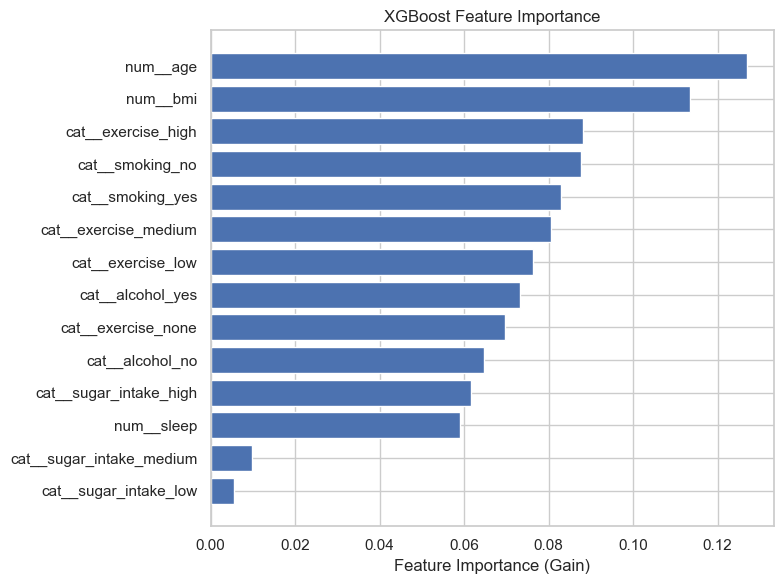

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Lấy model XGBoost từ pipeline
xgb_model = xgb_pipe.named_steps['model']

# Lấy tên feature sau preprocess
feature_names = xgb_pipe.named_steps['preprocess'].get_feature_names_out()

# Lấy importance
importances = xgb_model.feature_importances_

# Tạo DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# In bảng
print(feat_importance_df)

# Vẽ biểu đồ
plt.figure(figsize=(8,6))
plt.barh(
    feat_importance_df['Feature'],
    feat_importance_df['Importance']
)
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance (Gain)")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()


In [55]:

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

cv_accuracy = cross_val_score(
    xgb_pipe,
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)


cv_f1 = cross_val_score(
    xgb_pipe,
    X_train,
    y_train,
    cv=skf,
    scoring='f1'
)

print("\n===== XGBOOST – K-Fold Cross Validation (K=5) =====")
print("Accuracy từng fold:", cv_accuracy)
print("Accuracy trung bình:", cv_accuracy.mean())
print("Accuracy std:", cv_accuracy.std())

print("\nF1-score từng fold:", cv_f1)
print("F1-score trung bình:", cv_f1.mean())



===== XGBOOST – K-Fold Cross Validation (K=5) =====
Accuracy từng fold: [0.995   0.99875 0.9925  0.98375 0.9925 ]
Accuracy trung bình: 0.9925
Accuracy std: 0.004937104414532876

F1-score từng fold: [0.99641577 0.99910474 0.99462366 0.98831986 0.99460432]
F1-score trung bình: 0.9946136688333456


<p style="color: green; font-size: 24px">
   9. Đánh giá mô hình và lựa chọn mô hình tốt nhất
</p>


**🔹 KNN** 

CV Accuracy ≈ 94.2%

CV F1 ≈ 95.86%

Std nhỏ → rất ổn định

👉 KNN đang chạy rất tốt trên dataset này.

**🔹 Logistic Regression**

Thường:

Accuracy thấp hơn KNN

F1 thấp hơn do không học được phi tuyến

Nhạy với:

Đa cộng tuyến (weight – height – bmi)

Feature interaction

👉 Tốt để làm baseline, không phải mạnh nhất.

**🔹 Random Forest**

Ưu điểm:

Học phi tuyến

Ít nhạy outlier

Không sợ đa cộng tuyến

Nhược:

Dễ overfit nếu không khống chế depth

Đôi khi kém XGBoost với dataset vừa

👉 Mạnh, ổn định

**🔹 XGBoost**

Ưu điểm:

Học phi tuyến + tương tác feature

Chịu được mất cân bằng nhẹ

Regularization tốt

Thực tế:

Gần như luôn top 1 hoặc top 2

F1 & Recall rất cao

👉 Ứng viên mạnh nhất cho bài toán của bạn.

<p style="color:black; font-size:40px ;text-align:center;">Kết luận</p>

Sau khi đánh giá bốn mô hình gồm Logistic Regression, KNN, Random Forest và XGBoost bằng phương pháp  K-Fold Cross Validation, kết quả cho thấy XGBoost đạt hiệu suất cao và ổn định nhất trên bộ dữ liệu. Do đó, XGBoost được lựa chọn làm mô hình chính cho bài toán dự đoán mức độ rủi ro sức khỏe.

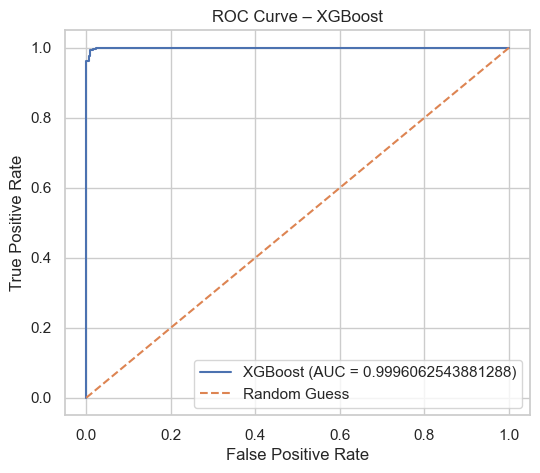

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Lấy xác suất dự đoán lớp dương (class = 1)
y_prob_xgb = xgb_pipe.predict_proba(X_test)[:, 1]

# 2. Tính ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)

# 3. Tính AUC
roc_auc = roc_auc_score(y_test, y_prob_xgb)

# 4. Vẽ biểu đồ ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

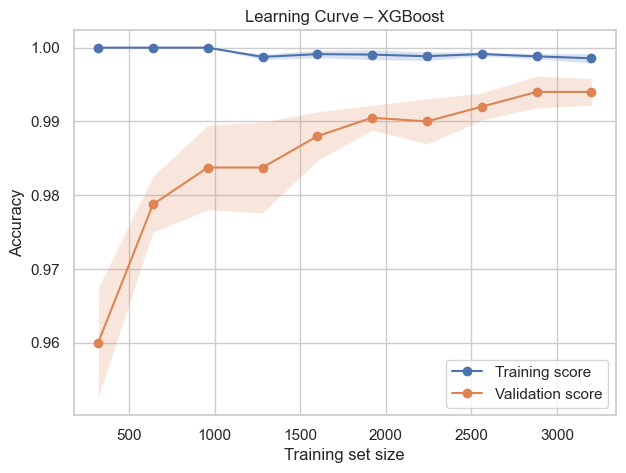

In [58]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Các kích thước tập train (tỷ lệ)
train_sizes = np.linspace(0.1, 1.0, 10)

# Tính learning curve
train_sizes, train_scores, val_scores = learning_curve(
    estimator=xgb_pipe,
    X=X_train,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Tính mean và std
train_mean = train_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)

val_mean = val_scores.mean(axis=1)
val_std  = val_scores.std(axis=1)

# Vẽ biểu đồ
plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', label='Validation score')

plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2
)

plt.fill_between(
    train_sizes,
    val_mean - val_std,
    val_mean + val_std,
    alpha=0.2
)

plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve – XGBoost")
plt.legend(loc="best")
plt.grid(True)
plt.show()


Biểu đồ Learning Curve cho thấy mô hình XGBoost đạt hiệu suất cao và ổn định. Khi kích thước tập huấn luyện tăng, độ chính xác trên tập validation tăng và tiệm cận với độ chính xác trên tập huấn luyện, chứng tỏ mô hình không bị overfitting và có khả năng tổng quát hóa tốt.

In [59]:
import joblib

joblib.dump(xgb_pipe, "xgboost_pipeline.pkl")


['xgboost_pipeline.pkl']